# Redes Mask R-CNN 

Mask R-CNN, o Mask RCNN, es una red neuronal convolucional (CNN) y lo último en términos de segmentación de imágenes y segmentación de instancias. Mask R-CNN se desarrolló sobre Faster R-CNN, una red neuronal convolucional basada en regiones.

El primer paso para comprender cómo funciona Mask R-CNN requiere comprender el concepto de segmentación de imágenes.

# Segmentación de imagenes

Una de las operaciones más importantes en Visión por Computador es la Segmentación. La segmentación de imágenes es la tarea de agrupar partes de una imagen que pertenecen a la misma clase de objeto. Este proceso también se denomina clasificación a nivel de píxel. En otras palabras, implica la partición de imágenes (o cuadros de video) en múltiples segmentos u objetos.

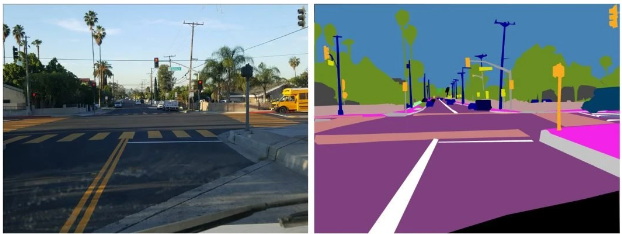

La tarea de visión artificial La segmentación de imágenes es el proceso de dividir una imagen digital en varios segmentos (conjuntos de píxeles, también conocidos como objetos de imagen). Esta segmentación se utiliza para localizar objetos y límites (líneas, curvas, etc.).

Detectron2 es una reescritura desde cero de Detectron que comenzó con
maskrcnn-benchmark

* La plataforma ya está implementada en PyTorch
* Con un diseño nuevo y más modular, Detectron2 es flexible y ampliable, y puede proporcionar una formación rápida en uno o varios servidores de GPU. Detectron2 incluye implementaciones de alta calidad de algoritmos de detección de objetos de última generación


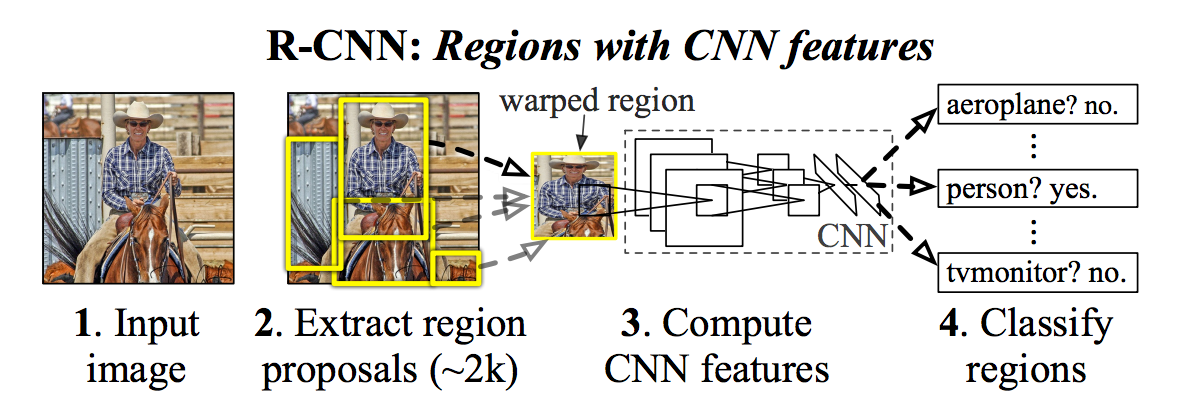

Ejemplo basado en la aplicación de anubhavde [Github](https://github.com/anubhavde/Detectron2/blob/main/detectron2.ipynb)

# Modelo

In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [ ]:
#!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-9c1dpc9_
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-9c1dpc9_


'1.11.0+cu113'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo


fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [ ]:
from detectron2.structures import BoxMode

# Ejecutar modelo

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
def borra_duplicados(lista):
  diccionario_aux = []
  for i in range(len(lista)):
    if lista[i] not in lista[i + 1:]:
        diccionario_aux.append(lista[i])
  return diccionario_aux

In [ ]:
def generar_diccionario_2(x):
  diccionario=[]
  for i in np.arange(df_definitivo.shape[0]):
    #aux_lista={"segmentation":df_definitivo['segmentation'][i],"bbox":df_definitivo['bbox'][i],"bbox_mode":BoxMode.XYXY_ABS,"category_id":df_definitivo['category_id'][i]}
    #aux_lista={"iscrowd":float(df_definitivo["iscrowd"][i]),"segmentation":df_definitivo['segmentation'][i],"bbox":df_definitivo['bbox'][i],"bbox_mode":BoxMode.XYXY_ABS,"category_id":float(0)}
    aux_list={'height':df_definitivo['height'][i],"width":df_definitivo['width'][i],'id':df_definitivo["ind_foto"][i],"file_name":df_definitivo["ruta_imagen"][i]}
    #aux_list=list(unique_everseen(aux_list))
    #aux_list = list(dict.fromkeys(aux_list))
    diccionario.append(aux_list)
    #diccionario.append({'file_name':df_definitivo["ruta_imagen"][i],'image_id':df_definitivo["image_id"][i],'height':df_definitivo['height'][i],'width':df_definitivo['width'][i]})
  return diccionario

In [ ]:
images=borra_duplicados(generar_diccionario_2("a"))

In [ ]:
categories=[{"supercategory":"Anomalia","id":1,"name":"Anomalia"},{"supercategory":"Sin Anomalia","id":0,"name":"Sin Anomalia"}]

In [ ]:
def generar_diccionario_3(x):
  diccionario=[]
  for i in np.arange(df_definitivo.shape[0]):
    #aux_lista={"segmentation":df_definitivo['segmentation'][i],"bbox":df_definitivo['bbox'][i],"bbox_mode":BoxMode.XYXY_ABS,"category_id":df_definitivo['category_id'][i]}
    #aux_lista={"iscrowd":float(df_definitivo["iscrowd"][i]),"segmentation":df_definitivo['segmentation'][i],"bbox":df_definitivo['bbox'][i],"bbox_mode":BoxMode.XYXY_ABS,"category_id":float(0)}
    aux_list={"segmentation":df_definitivo['segmentation'][i],"iscrowd":float(df_definitivo["iscrowd"][i]),"image_id":df_definitivo["ind_foto"][i],"bbox":df_definitivo['bbox'][i],"bbox_mode":BoxMode.XYXY_ABS,"category_id":df_definitivo['category_id'][i],"id":float(i)}
    diccionario.append(aux_list)
    #diccionario.append({'file_name':df_definitivo["ruta_imagen"][i],'image_id':df_definitivo["image_id"][i],'height':df_definitivo['height'][i],'width':df_definitivo['width'][i]})
  return diccionario

In [ ]:
annotations=borra_duplicados(generar_diccionario_3("a"))

In [ ]:
with open("/content/drive/MyDrive/topicos de estadistica/diccionario_2.json","a") as f:
  f.write(json.dumps({"images":images,"categories":categories,"annotations":annotations},indent=4))

In [ ]:
from detectron2.data.datasets import register_coco_instances

In [ ]:
register_coco_instances("pest_train_3", {}, "/content/drive/MyDrive/topicos de estadistica/diccionario_2.json", "/content/drive/MyDrive/topicos de estadistica/base")

In [ ]:
fruits_nuts_metadata = MetadataCatalog.get("pest_train_2")
dataset_dicts = DatasetCatalog.get("pest_train_2")

WARNING [07/05 03:58:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/05 03:58:42 d2.data.datasets.coco]: Loaded 458 images in COCO format from /content/drive/MyDrive/topicos de estadistica/diccionario_2.json
WARNING [07/05 03:58:42 d2.data.datasets.coco]: Filtered out 15 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


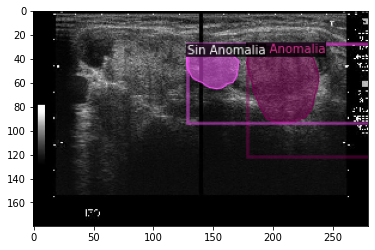

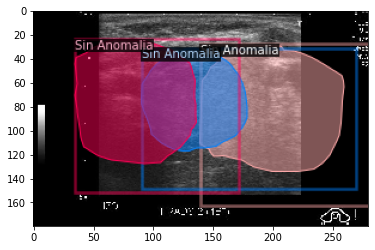

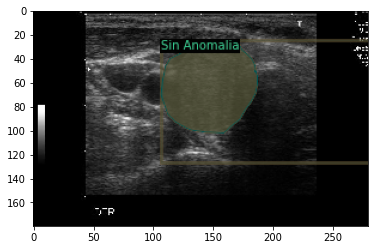

In [ ]:
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

In [ ]:
from detectron2.engine import DefaultTrainer


In [ ]:
cfg = get_cfg()
cfg.merge_from_file("/content/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("pest_train",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[07/05 03:59:02 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) 

[07/05 03:59:02 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/05 03:59:13 d2.utils.events]:  eta: 0:02:21  iter: 19  total_loss: 2.144  loss_cls: 0.6685  loss_box_reg: 0.5735  loss_mask: 0.6665  loss_rpn_cls: 0.007687  loss_rpn_loc: 0.02392  time: 0.5103  data_time: 0.0172  lr: 0.0012854  max_mem: 3120M
[07/05 03:59:23 d2.utils.events]:  eta: 0:02:11  iter: 39  total_loss: 1.452  loss_cls: 0.3048  loss_box_reg: 0.601  loss_mask: 0.42  loss_rpn_cls: 0.01974  loss_rpn_loc: 0.01606  time: 0.5104  data_time: 0.0078  lr: 0.0026174  max_mem: 3120M
[07/05 03:59:33 d2.utils.events]:  eta: 0:02:00  iter: 59  total_loss: 1.26  loss_cls: 0.2731  loss_box_reg: 0.5937  loss_mask: 0.3834  loss_rpn_cls: 0.005589  loss_rpn_loc: 0.009883  time: 0.5063  data_time: 0.0079  lr: 0.0039494  max_mem: 3120M
[07/05 03:59:43 d2.utils.events]:  eta: 0:01:50  iter: 79  total_loss: 1.378  loss_cls: 0.2972  loss_box_reg: 0.546  loss_mask: 0.404  loss_rpn_cls: 0.01594  loss_rpn_loc: 0.01273  time: 0.5090  data_time: 0.0077  lr: 0.0052814  max_mem: 3120M
[07/05 03:59:54 d2.

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("pest_train", )
predictor = DefaultPredictor(cfg)

[07/05 04:03:46 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

In [ ]:
from detectron2.utils.visualizer import ColorMode

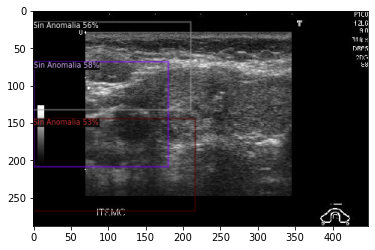

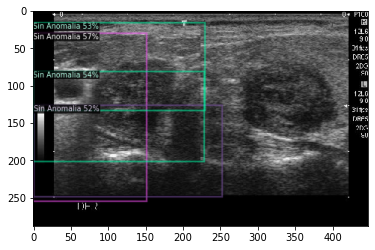

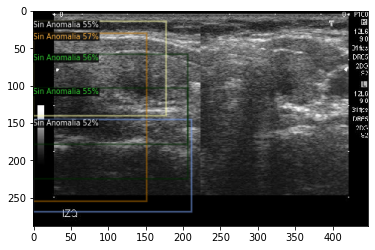

In [ ]:
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=fruits_nuts_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()